# Data Science Foundations <br> Extras 1: Thinking Data

**Instructor**: Wesley Beckner

**Contact**: wesleybeckner@gmail.com

---

<br>

Today we are going to take our newfound knowledge and tackle some data problems

<br>

---

<br>

<a name='x.0'></a>

## Prepare Environment and Import Data

[back to top](#top)

In [155]:
# basic packages
import pandas as pd
import numpy as np
import random
import copy

# visualization packages
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns; sns.set()
import graphviz 

# stats packages
import scipy.stats as stats
from scipy.spatial.distance import cdist
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

# sklearn preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

# sklearn modeling
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.mixture import GaussianMixture

# sklearn evaluation
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score

## Warm Up

Add aditional feature(s) to X to predict y with a model limited to a linear classification boundary

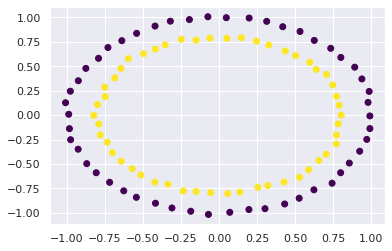

In [3]:
from sklearn.datasets import make_circles
X, y = make_circles(random_state=42, noise=.01)
relabel = dict(zip([0,1,2,3],[0,1,0,1]))
y = np.vectorize(relabel.get)(y)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')

In [16]:
X2 = (X**2).sum(axis=1)
X_ = np.hstack((X,X2.reshape(-1,1)))

We can separate:

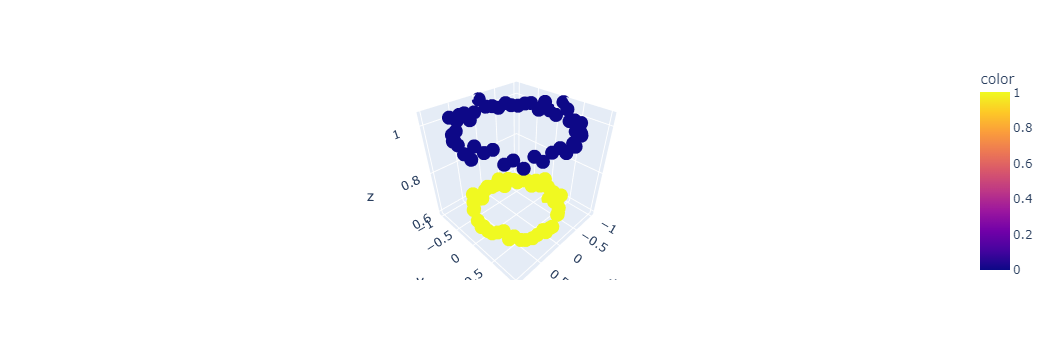

In [22]:
px.scatter_3d(x=X_[:,0], y=X_[:,1], z=X_[:,2], color=y)

and now predict

In [25]:
model = LogisticRegression()
model.fit(X_, y)
y_pred = model.predict(X_)
r2_score(y, y_pred)

1.0

## Exploratory Data Analysis

which columns are numerical, string; which contain nans/nulls; what is the VIF between features

In [76]:
airbnb = pd.read_csv("https://raw.githubusercontent.com/wesleybeckner/datasets/main/datasets/airbnb/AB_NYC_2019.csv")

In [77]:
airbnb.shape

(48895, 16)

In [78]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [79]:
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [80]:
airbnb.isnull().sum(axis=0)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [98]:
airbnb.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

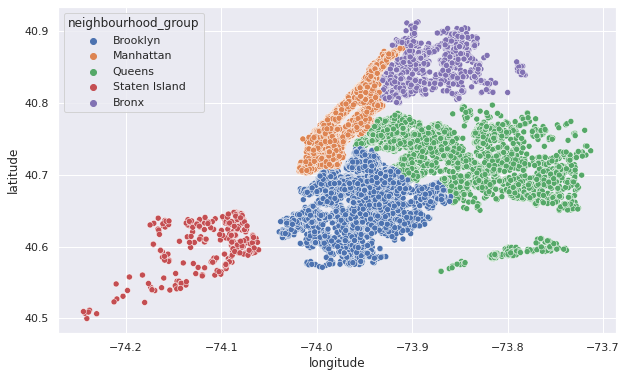

In [185]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=airbnb.longitude,y=airbnb.latitude,hue=airbnb.neighbourhood_group)
plt.ioff()

In [81]:
X = airbnb.copy()

reviews_per_month has some 'nans'

In [82]:
X_num = X.select_dtypes(exclude='object')
X_num.tail()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,8232441,40.67853,-73.94995,70,2,0,NaN,2,9
48891,36485057,6570630,40.70184,-73.93317,40,4,0,NaN,2,36
48892,36485431,23492952,40.81475,-73.94867,115,10,0,NaN,1,27
48893,36485609,30985759,40.75751,-73.99112,55,1,0,NaN,6,2
48894,36487245,68119814,40.76404,-73.98933,90,7,0,NaN,1,23


In [83]:
X_num.head()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,40.64749,-73.97237,149,1,9,0.21,6,365
1,2595,2845,40.75362,-73.98377,225,1,45,0.38,2,355
2,3647,4632,40.80902,-73.94190,150,3,0,NaN,1,365
3,3831,4869,40.68514,-73.95976,89,1,270,4.64,1,194
4,5022,7192,40.79851,-73.94399,80,10,9,0.10,1,0


In [84]:
X_num.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [88]:
X.dropna(inplace=True)
X_num = X.select_dtypes(exclude='object')

In [89]:
vif = [variance_inflation_factor(X_num.values, i) for i in range(X_num.shape[1])]
pd.DataFrame(vif, index=X_num.columns)

In [95]:
X_num.drop('longitude', axis=1, inplace=True)

/home/wbeckner/anaconda3/envs/py39/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [96]:
X_num

,id,host_id,latitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,40.64749,149,1,9,0.21,6,365
1,2595,2845,40.75362,225,1,45,0.38,2,355
3,3831,4869,40.68514,89,1,270,4.64,1,194
4,5022,7192,40.79851,80,10,9,0.10,1,0
5,5099,7322,40.74767,200,3,74,0.59,1,129
...,...,...,...,...,...,...,...,...,...
48782,36425863,83554966,40.78099,129,1,1,1.00,1,147
48790,36427429,257683179,40.75104,45,1,1,1.00,6,339
48799,36438336,211644523,40.54179,235,1,1,1.00,1,87
48805,36442252,273841667,40.80787,100,1,2,2.00,1,40


In [97]:
vif = [variance_inflation_factor(X_num.values, i) for i in range(X_num.shape[1])]
pd.DataFrame(vif, index=X_num.columns)

,0
id,8.424770
host_id,2.827543
latitude,7.297302
price,1.538975
minimum_nights,1.157468
number_of_reviews,3.215893
reviews_per_month,3.858006
calculated_host_listings_count,1.106414
availability_365,2.035592


## Feature Engineering

Say we want to predict pricing, using an ML model. How would you build your features?

Based on the number of null values, what would you do with the `last_review` and `reviews_per_month` column?

In [99]:
X = airbnb.copy()

In [105]:
X_cat = X.select_dtypes(include='object')
X_cat.head()

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,Private room,2018-10-19
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,Entire home/apt,2019-05-21
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,Private room,NaN
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,2019-07-05
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,Entire home/apt,2018-11-19


based on the number of unique columns, we may want to remove `name`, `host_name`, and `last_review`

In [106]:
X_cat.nunique()

name                   47905
host_name              11452
neighbourhood_group        5
neighbourhood            221
room_type                  3
last_review             1764
dtype: int64

In [108]:
X_cat = X_cat.drop(['name', 'host_name', 'last_review'], axis=1)

In [112]:
enc = OneHotEncoder()
X_enc = enc.fit_transform(X_cat).toarray()

In [113]:
X_num = X.select_dtypes(exclude='object')

both `id` and `host_id` will be highly cardinal without telling us much about the behavior of unseen data. We should remove them

In [115]:
X_num = X_num.drop(['id', 'host_id'], axis=1)

In [119]:
X_enc_df = pd.DataFrame(X_enc, columns=enc.get_feature_names_out())

In [122]:
X_feat = pd.concat((X_enc_df, X_num), axis=1)

In [136]:
X_feat = X_feat.drop(['reviews_per_month'], axis=1)

In [137]:
X_feat

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Allerton,neighbourhood_Arden Heights,neighbourhood_Arrochar,neighbourhood_Arverne,neighbourhood_Astoria,...,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,latitude,longitude,minimum_nights,calculated_host_listings_count,availability_365
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,40.64749,-73.97237,1,6,365
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,40.75362,-73.98377,1,2,355
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,40.80902,-73.94190,3,1,365
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,40.68514,-73.95976,1,1,194
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,40.79851,-73.94399,10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,40.67853,-73.94995,2,2,9
48891,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,40.70184,-73.93317,4,2,36
48892,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,40.81475,-73.94867,10,1,27
48893,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,40.75751,-73.99112,1,6,2


## Feature Transformation

What features do you think will cause the most problems if untransformed? 

Scale and Center all but the target variable, price

In [138]:
scaler = StandardScaler()
y = X_feat.pop('price')
X_std = scaler.fit_transform(X_feat)

In [140]:
X_std.shape

(48895, 234)

In [141]:
y.shape

(48895,)

## Model Baseline

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, train_size=0.8, random_state=42)

In [144]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [146]:
r2_score(y_train, model.predict(X_train))

0.10989217084945124

In [ ]:
r2_score(y_test, y_pred)

-3.0151033955403084e+24

In [147]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
r2_score(y_train, model.predict(X_train))

0.8671952200657349

In [148]:
r2_score(y_test, model.predict(X_test))

0.12233872053971129

both of these results from the `LinearRegression` and `RandomForest` models indicate overfitting

## Back to Feature Engineering

In [171]:
X_to_pca = X_feat.iloc[:,:-5] # grab one hot encoded features

In [172]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_to_pca)

In [173]:
X_std = scaler.fit_transform(X_feat.iloc[:,-5:])
X_std = np.hstack((X_pca, X_std))

In [174]:
pca.explained_variance_

array([0.53964396, 0.41513943, 0.16438329, 0.07812296, 0.06035576,
       0.05073931, 0.04038094, 0.04010025, 0.03907097, 0.03722079])

In [180]:
X_std.shape

(48895, 15)

## Model

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, train_size=0.8, random_state=42)

In [176]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [177]:
r2_score(y_train, model.predict(X_train))

0.08879713072296502

linear model still is not performing well

In [178]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
r2_score(y_train, model.predict(X_train))

0.8748702090177007

In [179]:
r2_score(y_test, model.predict(X_test))

0.14440978317556497

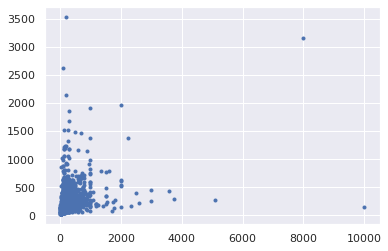

In [183]:
plt.plot(y_test, model.predict(X_test), ls='', marker='.')